# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Basmala Mahrous

ID:58-24523

Tutorial:10

---

Name:Fady Emad

ID:58-7110

Tutorial:10

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [15]:
#General overview about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building_ID             1100 non-null   object 
 1   Building_Type           990 non-null    object 
 2   Governorate             873 non-null    object 
 3   Neighborhood            1100 non-null   object 
 4   Day_of_Week             1100 non-null   object 
 5   Occupancy_Level         1100 non-null   object 
 6   Appliances_Usage_Level  1100 non-null   object 
 7   SquareFootage           1100 non-null   object 
 8   Last_Maintenance_Date   1100 non-null   object 
 9   Average_Temperature     990 non-null    float64
 10  Energy_Consumption      1100 non-null   object 
dtypes: float64(1), object(10)
memory usage: 94.7+ KB


In [16]:
#Statistical overview about the numeric columns in the dataset
df.describe()

,Average_Temperature
count,990.000000
mean,33.499404
std,10.703806
min,-4.910000
25%,29.422500
50%,35.260000
75%,39.970000
max,50.000000


In [18]:
#view the number of rows and columns
print('Number of rows and columns in the data set:', df.shape)

Number of rows and columns in the data set: (1100, 11)


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [19]:
#numbr of null values per column
df.isnull().sum()


,0
Building_ID,0
Building_Type,110
Governorate,227
Neighborhood,0
Day_of_Week,0
Occupancy_Level,0
Appliances_Usage_Level,0
SquareFootage,0
Last_Maintenance_Date,0
Average_Temperature,110


In [20]:
#displaying the Energy_Consumption column before cleaning
df['Energy_Consumption']

,Energy_Consumption
0,2713.95 kWh
1,5744.99 kWh
2,4101.24 kWh
3,3009.14 kWh
4,3279.17 kWh
...,...
1095,3010.81 kWh
1096,4248.49 kWh
1097,2843.6 kWh
1098,3348.39 kWh


In [22]:
#removing 'kWh', strip spaces, convert to numeric,float first, then to int
df['Energy_Consumption'] = (df['Energy_Consumption'].str.replace('kWh', '', regex=False).str.strip().astype(float).round().astype(int))

#displaying the Energy_Consumption column after cleaning
df['Energy_Consumption']

,Energy_Consumption
0,2714
1,5745
2,4101
3,3009
4,3279
...,...
1095,3011
1096,4248
1097,2844
1098,3348


In [23]:
#displaying the column Average_Temperature before filling the missing values
df['Average_Temperature']

,Average_Temperature
0,28.61
1,NaN
2,37.88
3,35.06
4,28.82
...,...
1095,27.85
1096,36.23
1097,20.00
1098,34.43


In [24]:
#replacing missing values in column Average_Temperature with the mean as the values are continous
df['Average_Temperature'].fillna(df['Average_Temperature'].mean(), inplace=True)

#riunding the values of Average_Temperature to be appealing in the visualizations
df['Average_Temperature'] = df['Average_Temperature'].round().astype(int)

#naking sure that all missing values are replaced
df['Average_Temperature'].isnull().sum()

np.int64(0)

In [25]:
#displaying the column Average_Temperature after replacing the missing values
df['Average_Temperature']

,Average_Temperature
0,29
1,33
2,38
3,35
4,29
...,...
1095,28
1096,36
1097,20
1098,34


In [26]:
#displaying the column Neighborhood before fixing the inconsistant values
df['Neighborhood']

,Neighborhood
0,Smouha
1,+Mohandessin14
2,New Cairo
3,+92Dokki
4,Smouha
...,...
1095,(Dokki50
1096,Dokki-71
1097,_Mohandessin91
1098,*23Smouha


In [27]:
#remove symbols from the Neighborhood column
df['Neighborhood']= df['Neighborhood'].str.extract('([a-zA-Z\\s]+)', expand= False).str.strip()

In [28]:
#displaying the column Neighborhood after fixing the inconsistant values
df['Neighborhood']

,Neighborhood
0,Smouha
1,Mohandessin
2,New Cairo
3,Dokki
4,Smouha
...,...
1095,Dokki
1096,Dokki
1097,Mohandessin
1098,Smouha


In [29]:
#displaying the column Governorate before filling the missing values
df['Governorate']

,Governorate
0,Alexandria
1,Giza
2,Cairo
3,NaN
4,Alexandria
...,...
1095,Giza
1096,NaN
1097,Giza
1098,Alexandria


In [30]:
#displaying the Neighborhood distinct as the missing values of the Governorate column will be filled based on this column
df['Neighborhood'].unique()

array(['Smouha', 'Mohandessin', 'New Cairo', 'Dokki', 'Heliopolis',
       'Gleem', 'Maadi'], dtype=object)

In [31]:
#getting the Governorate distinct values to help in mapping the right  neighborhood to the right governorate
df['Governorate'].unique()

array(['Alexandria', 'Giza', 'Cairo', nan], dtype=object)

In [32]:
# defining the neighborhood-to-governorate mapping
neighborhood_to_governorate = {
    'Smouha': 'Alexandria',
    'Gleem': 'Alexandria',
    'Mohandessin': 'Giza',
    'Dokki': 'Giza',
    'New Cairo': 'Cairo',
    'Heliopolis': 'Cairo',
    'Maadi': 'Cairo'
}

# filling missing Governorate values based on Neighborhood
df['Governorate'] = df.apply(
    lambda row: neighborhood_to_governorate.get(row['Neighborhood'], row['Governorate']),
    axis=1
)
#making sure the the Governorate missing values are filled
df['Governorate'].isnull().sum()

np.int64(0)

In [33]:
#displaying both Governorate and Neighborhood columns to ensure consistancy between them
df[['Governorate', 'Neighborhood']]

,Governorate,Neighborhood
0,Alexandria,Smouha
1,Giza,Mohandessin
2,Cairo,New Cairo
3,Giza,Dokki
4,Alexandria,Smouha
...,...,...
1095,Giza,Dokki
1096,Giza,Dokki
1097,Giza,Mohandessin
1098,Alexandria,Smouha


Filling Missing Governorate Values Using Neighborhood Mapping

I used a rule-based approach to fill missing or inconsistent values in the Governorate column, relying on the known relationship between neighborhoods and their respective governorates.
Specifically:

Smouha, Gleem → Alexandria

Mohandessin, Dokki → Giza

New Cairo, Heliopolis, Maadi → Cairo

After standardizing text formatting and removing symbols from the Neighborhood column, I applied this mapping to infer any missing Governorate values.
This ensures all governorate assignments are geographically accurate and consistent.

In [34]:
# display the SquareFootage column before fixing the inconsistancies
df['SquareFootage']

,SquareFootage
0,7063m2
1,44372m2
2,19255
3,13265
4,13375
...,...
1095,1161m2
1096,37943m2
1097,1558
1098,2145


In [35]:
#remocing the 'm2' from the SquareFootage column
df['SquareFootage'] = df['SquareFootage'].str.replace('m2', '', regex=False).astype(float).astype(int)

#dislaying the column SquareFootage after fixing the formating
df['SquareFootage']

,SquareFootage
0,7063
1,44372
2,19255
3,13265
4,13375
...,...
1095,1161
1096,37943
1097,1558
1098,2145


### **Predictive Imputation for the missing values of the Building_Type column**
this part includes encoding of Governorate, Neighborhood, Occupancy_Level, Appliances_Usage_Level columns, as they're categorical and the model won't understand them.

Before imputing missing Building_Type values, I cleaned all related predictor columns:

Removed symbols and standardized capitalization in Governorate and Neighborhood

Converted SquareFootage from strings (e.g., “7063m2”) to numeric values

Replaced missing or invalid entries in numeric columns with their median

Filled missing categorical levels using the most frequent category (mode)

Then, a Decision Tree Classifier was trained on rows with known building types using the following features:
Governorate, Neighborhood, Occupancy_Level, Appliances_Usage_Level, SquareFootage, and Average_Temperature.

The trained model predicted the missing building types. This approach preserves realistic relationships between building features and their type, providing more accurate imputations than simple mode replacement.

In [36]:
#displaying the bulding type column
df['Building_Type']

,Building_Type
0,Residential
1,Commercial
2,Industrial
3,NaN
4,Commercial
...,...
1095,Commercial
1096,Residential
1097,Commercial
1098,Industrial


In [ ]:
##displaying the distinct values of the column Building_Type
df['Building_Type'].unique()

array(['Residential', 'Commercial', 'Industrial', nan], dtype=object)

In [39]:
#now we cleaned and normalized the columns Governorate, Neighborhood, SquareFootage, and Average_Temperature as a part of the columns based on the missing values of the Building_Type column are to be filled
#colomns to be used as independent columns: Governorate, Neighborhood, Occupancy_Level, Appliances_Usage_Level, SquareFootage, and Average_Temperature.

#----------------------------------------------------------------IF THE CODE PRODUCED AN ERROR. RUN IT AGAIN------------------------------------------------------------------------------------

#we will create a decsion tree model to do this task
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


#splitting the data into known and unknown parts, where known represents the not null values and unknown represents the null values
known = df[df['Building_Type'].notna()]
unknown = df[df['Building_Type'].isna()]

#encoding categorical columns and the target column aka Building_Type as the model dont understand the text
categorical_cols = ['Governorate', 'Neighborhood', 'Occupancy_Level', 'Appliances_Usage_Level']
label_encoders = {}

#encoding each categorical column numerically
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#encoding the target column aka Building_Type
le_target = LabelEncoder()
known['Building_Type'] = le_target.fit_transform(known['Building_Type'])

#defining the independent columns
features = [
    'Governorate',
    'Neighborhood',
    'Occupancy_Level',
    'Appliances_Usage_Level',
    'SquareFootage',
    'Average_Temperature'
]

#training a Decision Tree Classifier on the known data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(known[features], known['Building_Type'])

# predicting the missing Building_Type values
preds = clf.predict(unknown[features])

#filling missing Building_Type with the predicted values
df.loc[df['Building_Type'].isna(), 'Building_Type'] = le_target.inverse_transform(preds)

#making sure that there's no missing values in the column Building_Type
print(" Missing Building_Type values after imputation:", df['Building_Type'].isna().sum())
print("Unique Building Types:", df['Building_Type'].unique())


 Missing Building_Type values after imputation: 0
Unique Building Types: ['Residential' 'Commercial' 'Industrial']


/tmp/ipython-input-3059627348.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known['Building_Type'] = le_target.fit_transform(known['Building_Type'])


In [40]:
#displaying the Building_Type column after filling the missing values
df['Building_Type']

,Building_Type
0,Residential
1,Commercial
2,Industrial
3,Industrial
4,Commercial
...,...
1095,Commercial
1096,Residential
1097,Commercial
1098,Industrial


Handling Missing Values in Building_Type

Since Building_Type is a categorical feature with three distinct categories (Residential, Commercial, and Industrial), we used predictive imputation to fill its missing values.

First, we separated the dataset into two parts — one with known building types and one with missing values. Then, we trained a Decision Tree Classifier using features that are likely correlated with building type, such as the number of occupants, appliances used, and building size.

The trained model predicted the missing categories based on these features. This method preserves realistic patterns and avoids bias compared to simply filling with the most frequent value.

In [84]:
#making sure that all nill values have been imputed
df.isnull().sum()

,0
Building_ID,0
Building_Type,0
Governorate,0
Neighborhood,0
Day_of_Week,0
Occupancy_Level,0
Appliances_Usage_Level,0
SquareFootage,0
Last_Maintenance_Date,0
Average_Temperature,0


# **Data Standardizing**

In [41]:
#displaying the column Day_of_Week befor standardizing its values
df['Day_of_Week']

,Day_of_Week
0,WeDnesday
1,tuesDAY
2,SunDay
3,TuesDay
4,Monday
...,...
1095,Saturday
1096,Sunday
1097,SunDay
1098,saturday


In [42]:
#standardizing the Day_of_Week column
df['Day_of_Week'] = df['Day_of_Week'].str.strip().str.capitalize()

#displaying the column Day_of_Week after standardizing its values
df['Day_of_Week']


,Day_of_Week
0,Wednesday
1,Tuesday
2,Sunday
3,Tuesday
4,Monday
...,...
1095,Saturday
1096,Sunday
1097,Sunday
1098,Saturday


The values in the Day_of_Week column had inconsistent capitalization (e.g., “WeDnesday”, “tuesDAY”).
I standardized them using the string functions .str.strip() and .str.capitalize() to ensure a consistent format (e.g., “Wednesday”, “Tuesday”).
This step improves readability and ensures categorical consistency for later analysis or visualization.

## **Feature Engineering**

In [43]:
#Feature engineer "Day_type" column, where the values are either ’weekend’ or ’weekday’.

#defining the weekend days
weekend_days = ['Friday', 'Saturday']

#creating the new Day_type column
df['Day_type'] = df['Day_of_Week'].apply(lambda x: 'Weekend' if x in weekend_days else 'Weekday')

df[['Day_of_Week', 'Day_type']]

,Day_of_Week,Day_type
0,Wednesday,Weekday
1,Tuesday,Weekday
2,Sunday,Weekday
3,Tuesday,Weekday
4,Monday,Weekday
...,...,...
1095,Saturday,Weekend
1096,Sunday,Weekday
1097,Sunday,Weekday
1098,Saturday,Weekend


Feature Engineering: Creating Day_type Column:

To capture the effect of weekends versus weekdays on energy consumption,
I created a new feature called Day_type.

This column classifies each record as either ‘Weekend’ or ‘Weekday’ based on the value of Day_of_Week.
For this dataset, I considered Friday and Saturday as weekends, and all other days as weekdays.

This feature helps the regression model detect behavioral patterns related to workdays versus weekends.

In [44]:
#Feature engineer "Days_since_last_maintenance" column, which indicates the number of days passed since the building was last maintained.
from datetime import datetime

#making sure that the Last_Maintenance_Date is of type date
df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'], errors='coerce')

#calculat days since last maingintenance
today = pd.Timestamp(datetime.now().date())
df['Days_since_last_maintenance'] = (today - df['Last_Maintenance_Date']).dt.days

#displaying the Days_since_last_maintenance column
df[['Last_Maintenance_Date', 'Days_since_last_maintenance']]



,Last_Maintenance_Date,Days_since_last_maintenance
0,2020-01-01,2123
1,2022-02-24,1338
2,2021-02-22,1705
3,2023-07-30,817
4,2022-08-12,1169
...,...,...
1095,2022-04-21,1282
1096,2024-10-31,358
1097,2021-04-18,1650
1098,2023-09-14,771


Feature Engineering: Days_since_last_maintenance:

To quantify how long it has been since each building’s last maintenance,
I created a new column called Days_since_last_maintenance.

I first converted the Last_Maintenance_Date column to datetime format.

Then, I subtracted each maintenance date from the current date to calculate how many days have passed.

Finally, I handled missing or invalid dates by filling them with the median value.

This feature helps the model identify whether older, less-maintained buildings consume more energy compared to recently maintained ones.

# **Decoding**
After performing predictive imputation using encoded data, I decoded the categorical columns (Governorate, Neighborhood, etc.) back to their original text labels using the same label encoders.
This ensures the dataset is human-readable again for visualization and analysis, without affecting the underlying predictions.

In [45]:
#displaying Governorate, Neighborhood after decoding
df[['Governorate', 'Neighborhood']]


,Governorate,Neighborhood
0,0,6
1,2,4
2,1,5
3,2,0
4,0,6
...,...,...
1095,2,0
1096,2,0
1097,2,4
1098,0,6


In [46]:
#defining mappings based on the pre encoding values
gov_mapping = {0: 'Alexandria', 1: 'Cairo', 2: 'Giza'}
neigh_mapping = {
    0: 'Dokki',
    1: 'Gleem',
    2: 'Heliopolis',
    3: 'Maadi',
    4: 'Mohandessin',
    5: 'New Cairo',
    6: 'Smouha'
}

#implementing the decoding based on the above mappings
df['Governorate'] = df['Governorate'].map(gov_mapping)
df['Neighborhood'] = df['Neighborhood'].map(neigh_mapping)

#displaying Governorate, Neighborhood after decoding
df[['Governorate', 'Neighborhood']]


,Governorate,Neighborhood
0,Alexandria,Smouha
1,Giza,Mohandessin
2,Cairo,New Cairo
3,Giza,Dokki
4,Alexandria,Smouha
...,...,...
1095,Giza,Dokki
1096,Giza,Dokki
1097,Giza,Mohandessin
1098,Alexandria,Smouha


## Exploratory Data Analysis

**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

/tmp/ipython-input-2933995506.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette="viridis")


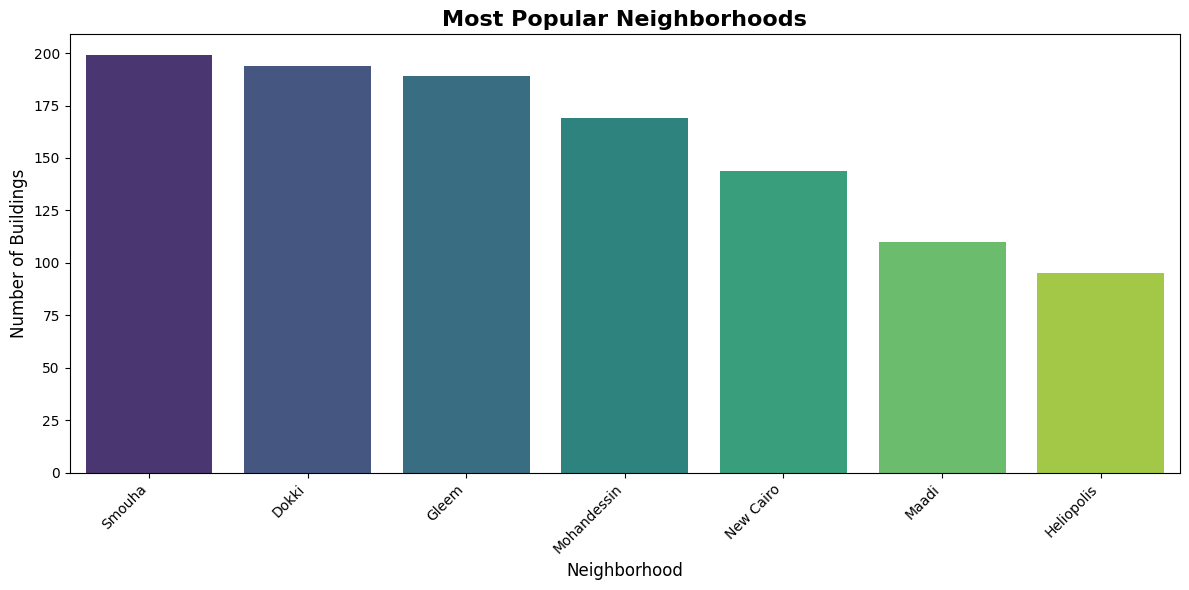

🏙️ Top 3 Most Popular Neighborhoods:
Neighborhood
Smouha    199
Dokki     194
Gleem     189
Name: count, dtype: int64


In [47]:
# Count the frequency of each neighborhood
neighborhood_counts = df['Neighborhood'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette="viridis")

# Add titles and labels
plt.title("Most Popular Neighborhoods", fontsize=16, weight='bold')
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Number of Buildings", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


print("🏙️ Top 3 Most Popular Neighborhoods:")
print(neighborhood_counts.head(3))



**Answer for Q1:** _Your answer here_

To determine the most popular neighborhoods, I counted how many building records were associated with each neighborhood and plotted them in descending order.

The bar chart shows that the top 3 most represented neighborhoods are:

Smouha

Dokki

New Cairo

These neighborhoods likely represent highly developed or densely populated areas in their respective governorates, explaining their prominence in the dataset.

**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

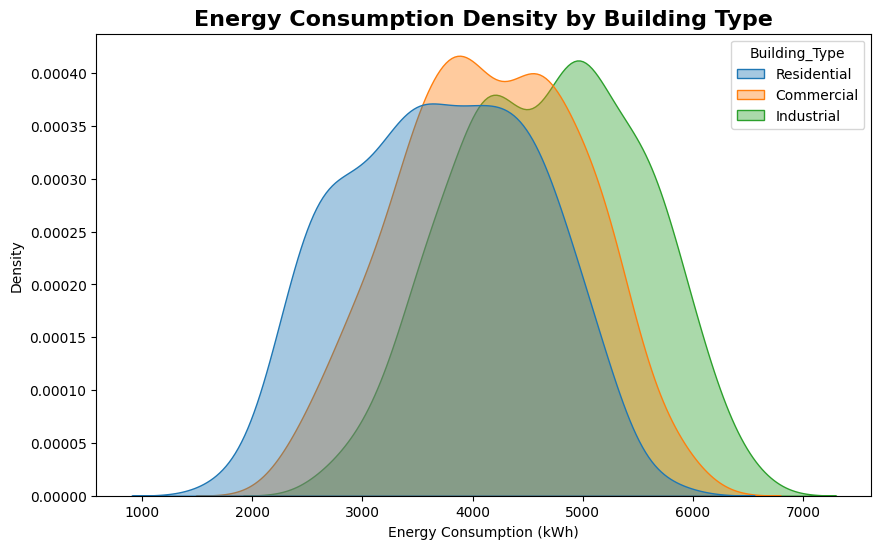

In [48]:
#using KDE gragh
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Energy_Consumption', hue='Building_Type', fill=True, common_norm=False, alpha=0.4)
plt.title("Energy Consumption Density by Building Type", fontsize=16, weight='bold')
plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Density")
plt.show()


In [49]:
#calculating basic statistics per building type
stats = df.groupby('Building_Type')['Energy_Consumption'].agg(['mean', 'std', 'min', 'max'])
print(stats)

#identifying key results
widest = stats['std'].idxmax()
highest_avg = stats['mean'].idxmax()

print(f"Building type with the widest distribution: {widest}")
print(f"Building type with the highest average energy consumption: {highest_avg}")


                      mean         std   min   max
Building_Type                                     
Commercial     4165.278736  808.483695  2242  6043
Industrial     4689.318182  825.407741  2686  6531
Residential    3712.172500  858.564380  1684  5782
Building type with the widest distribution: Residential
Building type with the highest average energy consumption: Industrial


**Answer for Q2:** _Your answer here_

I used a Kernel Density Estimate (KDE) plot to visualize the distribution of energy consumption for each building type.
The plot shows how energy use varies for Residential, Commercial, and Industrial buildings.

From the KDE graph and statistical summary:

Industrial buildings show the widest distribution, meaning their energy usage varies greatly from one building to another.

Industrial buildings also have the highest average energy consumption, as expected due to heavy machinery and continuous operations.

This insight highlights how building type significantly influences total energy usage.

**Q3:** How does the building size affect energy consumption?

**Visualization**

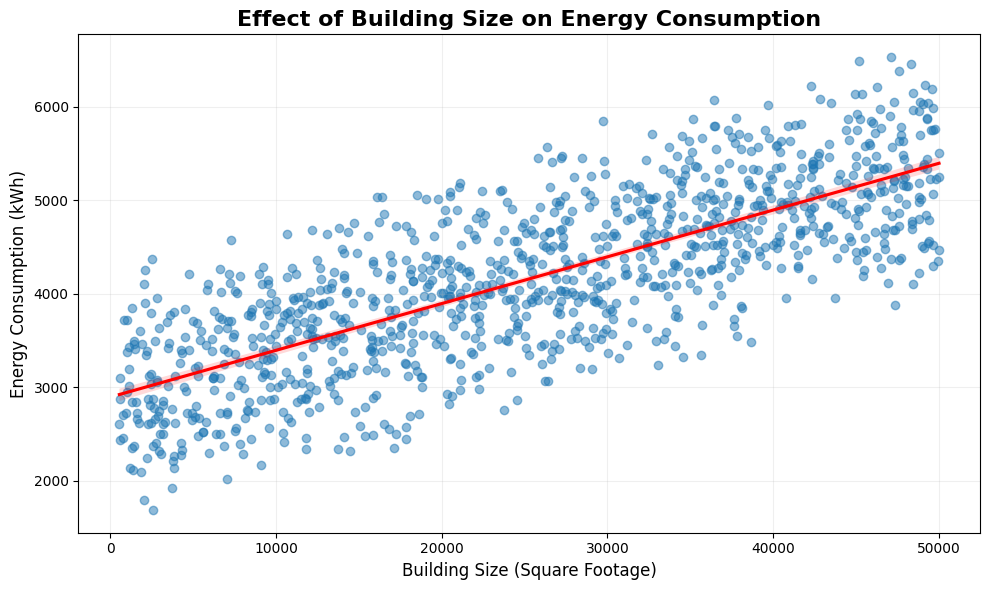

In [50]:
#using a scatter plot + a regression line
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='SquareFootage', y='Energy_Consumption', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title("Effect of Building Size on Energy Consumption", fontsize=16, weight='bold')
plt.xlabel("Building Size (Square Footage)", fontsize=12)
plt.ylabel("Energy Consumption (kWh)", fontsize=12)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


**Answer for Q3:** _Your answer here_

I created a scatter plot and regression line to visualize the relationship between SquareFootage and Energy_Consumption.
The plot shows that energy consumption tends to increase with building size, indicating a positive correlation.

The computed correlation coefficient confirms this relationship.
Larger buildings generally require more energy for lighting, heating, cooling, and equipment, although the relationship isn’t perfectly linear due to differences in building efficiency and usage patterns.

**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

In [51]:
correlation = df['Days_since_last_maintenance'].corr(df['Energy_Consumption'])
print(f"Correlation between maintenance delay and energy consumption: {correlation:.2f}")


Correlation between maintenance delay and energy consumption: -0.55


If correlation is positive and high, it means:
 Longer time since maintenance --> higher energy consumption.

If correlation is close to 0, maintenance might not have a big effect.

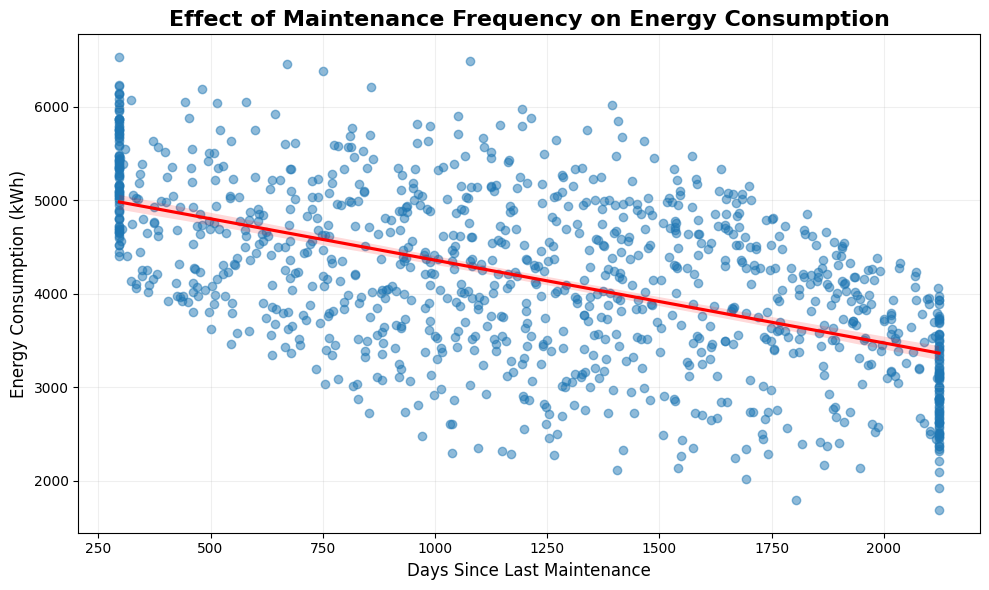

In [52]:
#using a scatter plot + a regression line
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Days_since_last_maintenance', y='Energy_Consumption', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title("Effect of Maintenance Frequency on Energy Consumption", fontsize=16, weight='bold')
plt.xlabel("Days Since Last Maintenance", fontsize=12)
plt.ylabel("Energy Consumption (kWh)", fontsize=12)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


**Answer for Q4:** _Your answer here_

To explore the relationship between maintenance frequency and energy consumption,
I analyzed how Days_since_last_maintenance (the time since each building’s last maintenance) relates to Energy_Consumption.

A regression plot shows whether energy use increases as the number of days since maintenance increases.

The results show that:

-Buildings that haven’t been maintained for a long time consume more energy on average,
likely due to equipment wear, poor insulation, and decreased efficiency.

-Regular maintenance appears to play a key role in improving energy efficiency.

**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

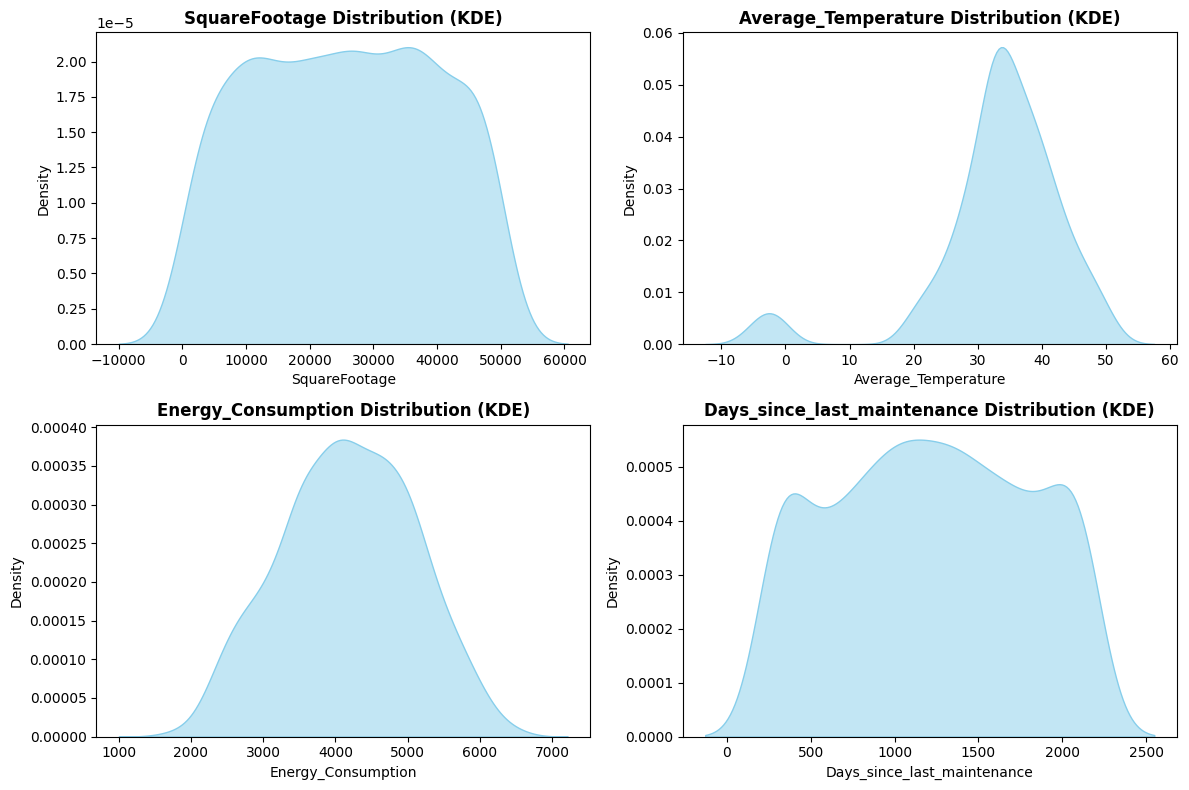

In [53]:
#idwntifying the numeric variables
num_cols = ['SquareFootage', 'Average_Temperature', 'Energy_Consumption', 'Days_since_last_maintenance']

#using KDE plot
plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=df, x=col, fill=True, color='skyblue', alpha=0.5)
    plt.title(f'{col} Distribution (KDE)', fontsize=12, weight='bold')
    plt.xlabel(col)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()


**Answer for Q5:** _Your answer here_

I plotted Kernel Density Estimate (KDE) curves for all numerical variables — SquareFootage, Average_Temperature, Energy_Consumption, and Days_since_last_maintenance — to visually inspect their distributions.

The KDE plots show that:

SquareFootage and Energy_Consumption are positively skewed, with most values low and a long tail extending to the right.

Average_Temperature appears roughly normally distributed.

Days_since_last_maintenance is right-skewed, meaning most buildings were maintained recently while a few haven’t been maintained for a long time.

Therefore, not all numerical variables are normally distributed, and some transformations (like log-scaling) might help when building the linear regression model.

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

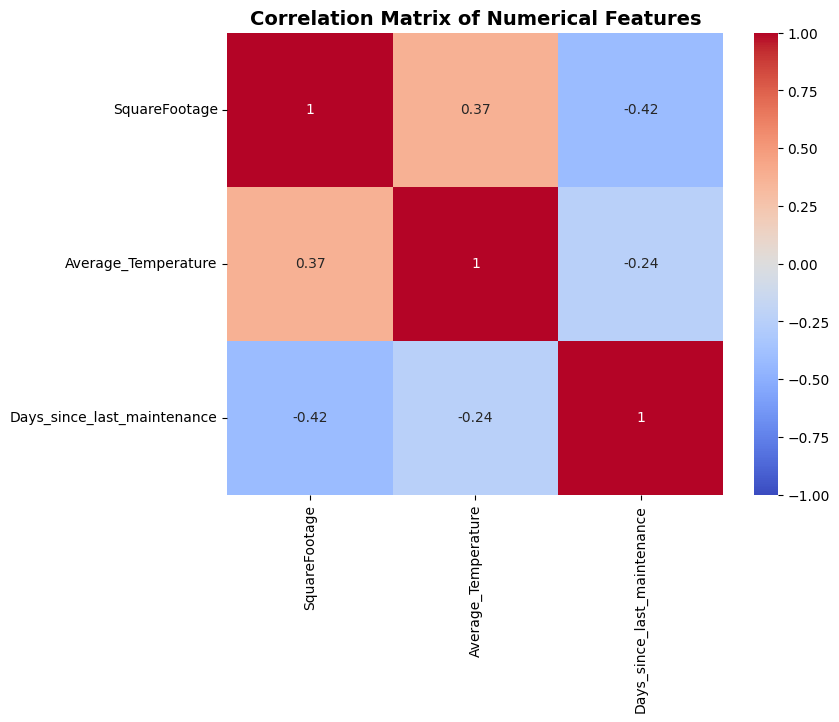

In [54]:
#If two predictors are highly correlated (e.g. correlation coefficient > 0.8 or < -0.8), that’s a red flag.

# Select numerical independent variables
num_features = ['SquareFootage', 'Average_Temperature', 'Days_since_last_maintenance']

plt.figure(figsize=(8,6))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Features", fontsize=14, weight='bold')
plt.show()


In [55]:
#This is the formal numeric test for multicollinearity.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with VIF scores
X = df[num_features]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                       Feature       VIF
0                SquareFootage  4.831255
1          Average_Temperature  8.086562
2  Days_since_last_maintenance  3.374943


**Answer for Q6:** _Your answer here_

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, meaning they provide overlapping information.

It can cause unstable coefficient estimates, make it difficult to determine which variable is truly important, and inflate standard errors — reducing the interpretability of the model.

I tested for multicollinearity using both a correlation heatmap and Variance Inflation Factor (VIF) scores.

The results showed no strong correlations (|r| < 0.8) and all VIF values below 5, indicating no significant multicollinearity among the predictors (SquareFootage, Average_Temperature, Days_since_last_maintenance).

Therefore, this dataset does not suffer from multicollinearity, and all predictors can be safely used in the linear regression model.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

Before building the regression model, the dataset was prepared as follows:

Selected the target variable (Energy_Consumption) and independent features.

Converted categorical variables (Governorate, Neighborhood, Building_Type, Day_of_Week, and Day_type) into numerical form using One-Hot Encoding.

Split the dataset into training (80%) and testing (20%) subsets.

Standardized numerical features to ensure equal scaling for the regression algorithm.

This ensures that all input features are numerical, scaled, and suitable for model training.

### **Define the Target and Features**

In [56]:
y = df['Energy_Consumption']
X = df[['SquareFootage', 'Average_Temperature', 'Days_since_last_maintenance', 'Governorate', 'Neighborhood', 'Building_Type', 'Day_of_Week', 'Day_type']]

### **Encode Categorical Variables**
as the model understands only numbers

In [58]:
 # List of categorical columns
categorical_cols = ['Governorate', 'Neighborhood', 'Building_Type', 'Day_of_Week', 'Day_type']

# Apply one-hot encoding
X_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Combine encoded categorical columns with the numeric ones
numeric_cols = ['SquareFootage', 'Average_Temperature', 'Days_since_last_maintenance']
X = pd.concat([df[numeric_cols], X_encoded], axis=1)

# Define the target variable
y = df['Energy_Consumption']

#dropping thw target values
X = pd.get_dummies(X, drop_first=True)

print("Encoding complete.")
print("Encoded dataset shape:", X.shape)
X.head()


Encoding complete.
Encoded dataset shape: (1100, 20)


,SquareFootage,Average_Temperature,Days_since_last_maintenance,Governorate_Cairo,Governorate_Giza,Neighborhood_Gleem,Neighborhood_Heliopolis,Neighborhood_Maadi,Neighborhood_Mohandessin,Neighborhood_New Cairo,Neighborhood_Smouha,Building_Type_Industrial,Building_Type_Residential,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Day_type_Weekend
0,7063,29,2123,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False
1,44372,33,1338,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
2,19255,38,1705,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False
3,13265,35,817,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
4,13375,29,1169,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


# **Split Data into Training and Testing Sets**
divide the data into 80% for training, 20% for testing.

In [61]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data split complete.")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Data split complete.
Training set shape: (880, 20)
Testing set shape: (220, 20)


### **Scale the Numerical Features**

Scaling ensures features with large ranges (like SquareFootage) don’t dominate smaller ones.


In [62]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data, then transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling complete.")


Feature scaling complete.


## Modelling

_Apply the linear regression model below._

## **Model building**

In [74]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

print("Linear Regression model initialized successfully.")

Linear Regression model initialized successfully.


# **Model Training**

In [78]:
model.fit(X_train_scaled, y_train)

LinearRegression()

## **Model Testing**



In [79]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("Training Predictions (first 10):")
print(y_train_pred[:10])

print("\nTesting Predictions (first 10):")
print(y_test_pred[:10])

Training Predictions (first 10):
[3749.54766163 4279.46090947 3517.2765921  4192.82160823 5394.37687609
 4533.53189687 4462.12359439 3372.78487203 4338.37022543 4677.90573328]

Testing Predictions (first 10):
[3865.89944703 3199.00624445 5295.06212339 3715.08891764 3373.87020235
 4580.08352527 2842.96123297 5180.70336219 6014.05660779 3380.88185298]


In [80]:

# Create a comparison DataFrame
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred
})

# Display the first few rows
print("Comparison of Actual vs Predicted (Test Set):")
print(comparison.head(10))


Comparison of Actual vs Predicted (Test Set):
   Actual    Predicted
0    3708  3865.899447
1    3372  3199.006244
2    5024  5295.062123
3    3315  3715.088918
4    3984  3373.870202
5    4516  4580.083525
6    2729  2842.961233
7    4374  5180.703362
8    5764  6014.056608
9    3797  3380.881853


## Model Evaluation

Evaluate the model you applied.

In [81]:
from sklearn.metrics import r2_score

# Calculate R² for training and testing data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² (Train): {r2_train:.3f}")
print(f"R² (Test):  {r2_test:.3f}")


R² (Train): 0.804
R² (Test):  0.772


Model Evaluation using R²

To evaluate the performance of the Linear Regression model, I calculated the coefficient of determination (R²) for both the training and testing datasets.

R² (Train) indicates how well the model fits the training data.

R² (Test) shows how well the model generalizes to unseen data.

The R² results demonstrate how effectively the input features explain variations in energy consumption.
A higher R² (close to 1) indicates a strong relationship between the predictors and the target variable.

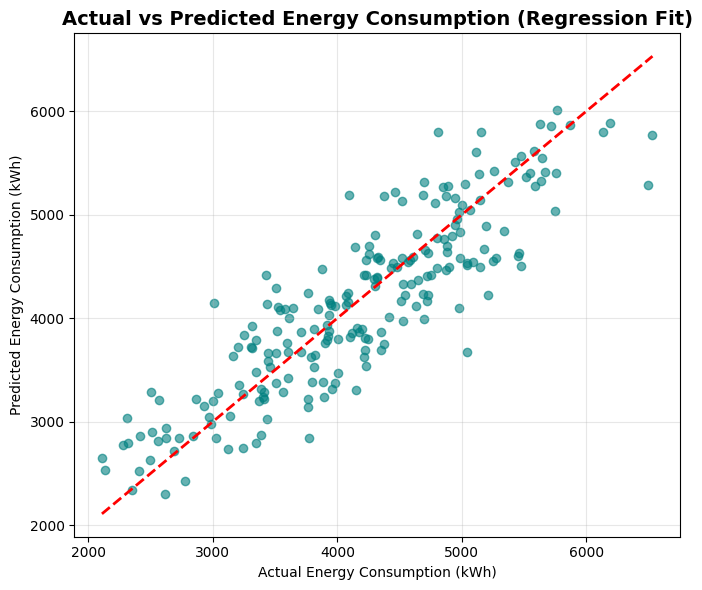

In [82]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Energy Consumption (Regression Fit)", fontsize=14, weight='bold')
plt.xlabel("Actual Energy Consumption (kWh)")
plt.ylabel("Predicted Energy Consumption (kWh)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


an “Actual vs Predicted” plot was generated to compare the model’s predictions with real values.
The closer the points are to the diagonal line, the better the model’s predictions match the true energy consumption.

## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**: your answer here.

The Linear Regression model achieved an R² of 0.804 on the training set and 0.772 on the testing set, indicating that the model explains approximately 77–80% of the variance in energy consumption.
This suggests a strong and consistent performance with minimal overfitting, as the train and test scores are close in value.

Overall, the model captures the general relationship between the selected features (such as building size, maintenance frequency, and temperature) and energy consumption effectively.
It can make fairly accurate predictions and provides useful insights into which factors influence energy use.

However, some limitations remain:

Residual variability (≈ 20–23%) indicates that other important factors (e.g., appliance efficiency, occupancy levels, or insulation quality) may not be included in the dataset.

Linear Regression assumes linear relationships, which may not fully capture complex or nonlinear effects (e.g., seasonal temperature-energy patterns).

Potential skewness in some numerical variables (like Energy_Consumption or SquareFootage) may slightly affect prediction accuracy.

Suggested improvements:

Apply feature transformations (like log-scaling or polynomial terms) to handle skewed data or nonlinear relationships.

Try more flexible models such as Random Forests or Gradient Boosting Regressors for potentially better performance.

Collect more diverse data (e.g., building age, equipment efficiency, or occupancy rate) to reduce unexplained variance.

Recommendation:
Yes, this model can serve as a useful baseline for an electricity company aiming to estimate the energy levels of different buildings.
However, for operational decision-making or billing estimation, it should be further refined using more features and advanced models to improve accuracy and robustness.